<a href="https://colab.research.google.com/github/AlineEmmer/MachineLearning/blob/main/RF_Shapvalues_dyslipidemia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Analisando as variáveis importantes via SHAP values: PARTE 1"**

In [ ]:
## Step 1: Importing and visualizing the dataset
## step 2: Defining predictor and response variables
## Step 3: Splitting the training and test data
## Step 4: Training the Top 5 machine learning models
## Step 5: Installing and importing SHAP library
## Step 6: Shap Values
## Step 7: Comparison of important features

##**Step 1: Importing and visualizing the dataset**

In [ ]:
### Importing dataset

from google.colab import files
uploaded = files.upload()

Saving Dislipidemia_PCA_#.xlsx to Dislipidemia_PCA_#.xlsx


In [ ]:
### Visualizing the dataset

import pandas as pd
df = pd.read_excel("Dislipidemia_PCA_#.xlsx")
display (df.head())

,Classes,3000,2999.5,2998.1,2996.7,2995.3,2993.9,2992.4,2991,2989.6,...,1412.6,1411.2,1409.8,1408.4,1407,1405.5,1404.1,1402.7,1401.3,1400
0,1,0.8724,0.8733,0.8742,0.8754,0.8767,0.8780,0.8791,0.8803,0.8816,...,0.8955,0.8954,0.8949,0.8943,0.8937,0.8931,0.8926,0.8921,0.8915,0.8908
1,1,0.8730,0.8739,0.8749,0.8760,0.8771,0.8783,0.8795,0.8808,0.8823,...,0.8984,0.8982,0.8979,0.8974,0.8969,0.8963,0.8958,0.8953,0.8947,0.8940
2,1,0.8725,0.8736,0.8747,0.8760,0.8773,0.8785,0.8795,0.8807,0.8819,...,0.8981,0.8977,0.8972,0.8968,0.8964,0.8961,0.8959,0.8956,0.8950,0.8942
3,1,0.8728,0.8737,0.8747,0.8758,0.8772,0.8786,0.8800,0.8813,0.8826,...,0.8981,0.8977,0.8973,0.8969,0.8967,0.8965,0.8961,0.8954,0.8946,0.8936
4,1,0.8729,0.8738,0.8746,0.8757,0.8770,0.8783,0.8797,0.8810,0.8823,...,0.8976,0.8975,0.8973,0.8970,0.8966,0.8960,0.8955,0.8949,0.8943,0.8936


##**Step 2: Defining predictor and response variables**

In [ ]:
x = df.drop("Classes", axis = 1)
y = df["Classes"]

In [ ]:
x

,3000.0,2999.5,2998.1,2996.7,2995.3,2993.9,2992.4,2991.0,2989.6,2988.2,...,1412.6,1411.2,1409.8,1408.4,1407.0,1405.5,1404.1,1402.7,1401.3,1400.0
0,0.8724,0.8733,0.8742,0.8754,0.8767,0.8780,0.8791,0.8803,0.8816,0.8828,...,0.8955,0.8954,0.8949,0.8943,0.8937,0.8931,0.8926,0.8921,0.8915,0.8908
1,0.8730,0.8739,0.8749,0.8760,0.8771,0.8783,0.8795,0.8808,0.8823,0.8836,...,0.8984,0.8982,0.8979,0.8974,0.8969,0.8963,0.8958,0.8953,0.8947,0.8940
2,0.8725,0.8736,0.8747,0.8760,0.8773,0.8785,0.8795,0.8807,0.8819,0.8831,...,0.8981,0.8977,0.8972,0.8968,0.8964,0.8961,0.8959,0.8956,0.8950,0.8942
3,0.8728,0.8737,0.8747,0.8758,0.8772,0.8786,0.8800,0.8813,0.8826,0.8839,...,0.8981,0.8977,0.8973,0.8969,0.8967,0.8965,0.8961,0.8954,0.8946,0.8936
4,0.8729,0.8738,0.8746,0.8757,0.8770,0.8783,0.8797,0.8810,0.8823,0.8835,...,0.8976,0.8975,0.8973,0.8970,0.8966,0.8960,0.8955,0.8949,0.8943,0.8936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.8794,0.8808,0.8821,0.8835,0.8848,0.8861,0.8874,0.8888,0.8903,0.8917,...,0.8995,0.8993,0.8990,0.8987,0.8984,0.8981,0.8978,0.8975,0.8972,0.8969
396,0.8796,0.8808,0.8820,0.8835,0.8851,0.8865,0.8878,0.8891,0.8904,0.8917,...,0.8989,0.8988,0.8987,0.8985,0.8982,0.8978,0.8973,0.8969,0.8965,0.8960
397,0.8797,0.8809,0.8821,0.8836,0.8849,0.8861,0.8873,0.8886,0.8901,0.8914,...,0.8986,0.8985,0.8982,0.8979,0.8976,0.8972,0.8968,0.8963,0.8959,0.8956
398,0.8799,0.8812,0.8825,0.8839,0.8852,0.8864,0.8876,0.8889,0.8904,0.8918,...,0.8984,0.8983,0.8980,0.8977,0.8973,0.8969,0.8965,0.8962,0.8959,0.8955


In [ ]:
y

0      1
1      1
2      1
3      1
4      1
      ..
395    0
396    0
397    0
398    0
399    0
Name: Classes, Length: 400, dtype: int64

##**Step 3: Splitting the training and test data**

In [ ]:
###  Importando pacotes de visualização dos resultados dos modelos de machine learning
import seaborn as sns


# Importando pacotes para a divisão dos dados de treinamento e de teste
import sklearn
from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.20, random_state=100)

x_treino1, x_val, y_treino1, y_val = train_test_split(x_treino, y_treino, test_size=0.20, random_state=102)

##**Step 4: Training the Top 3 machine learning models**

## TOP 1: Random Forest

In [ ]:
# Treinando o modelo
from sklearn.ensemble import RandomForestClassifier
modelo3 = RandomForestClassifier()
modelo3.fit(x_treino1, y_treino1)

RandomForestClassifier()

##**Step 5: Installing and importing SHAP library**

In [ ]:
# Instalando a biblioteca shap value
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 5.6 MB/s eta 0:00:00


In [ ]:
# Para calcular valores SHAP para o modelo, precisamos criar um objeto "Explainer"
# o objeto Explainer será usado  para avaliar uma amostra ou o conjunto de dados completo

# Importando o SHAP
import shap

# Ajuste do explainer
explainer = shap.Explainer(modelo3.predict, x_val, max_evals=5100)
# Calculando o SHAP values - demora um pouco
shap_values = explainer(x_val)

PermutationExplainer explainer: 65it [03:47,  3.61s/it]


In [ ]:
# Se quisermos simplesmente as importâncias das features conforme determinado pelo algoritmo SHAP,
# precisamos obter o valor médio médio de cada features
import numpy as np
from scipy.special import softmax

def print_feature_importances_shap_values(shap_values, features):
    '''
    Prints the feature importances based on SHAP values in an ordered way
    shap_values -> The SHAP values calculated from a shap.Explainer object
    features -> The name of the features, on the order presented to the explainer
    '''
    # Calculates the feature importance (mean absolute shap value) for each feature
    importances = []
    for i in range(shap_values.values.shape[1]):
        importances.append(np.mean(np.abs(shap_values.values[:, i])))
    # Calculates the normalized version
    importances_norm = softmax(importances)
    # Organize the importances and columns in a dictionary
    feature_importances = {fea: imp for imp, fea in zip(importances, features)}
    feature_importances_norm = {fea: imp for imp, fea in zip(importances_norm, features)}
    # Sorts the dictionary
    feature_importances = {k: v for k, v in sorted(feature_importances.items(), key=lambda item: item[1], reverse = True)}
    feature_importances_norm= {k: v for k, v in sorted(feature_importances_norm.items(), key=lambda item: item[1], reverse = True)}
    # Prints the feature importances
    for k, v in feature_importances.items():
        print(f"{k} -> {v:.4f} (softmax = {feature_importances_norm[k]:.4f})")

O gráfico acima, os descritores (features) são ordenados do maior para o menor efeito na previsão. Ele leva em consideração o valor SHAP absoluto, portanto, não importa se a feature afeta a previsão de forma positiva ou negativa.

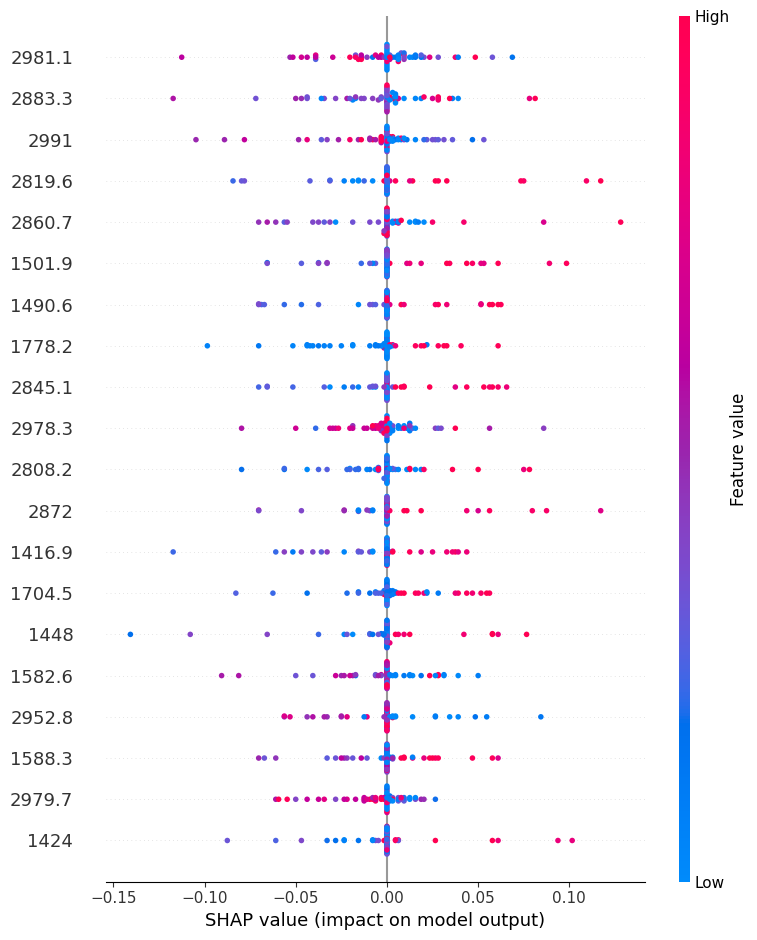

In [ ]:
# Gráfico de resumo da importancia das features: OPÇÃO 1
shap.summary_plot(shap_values)

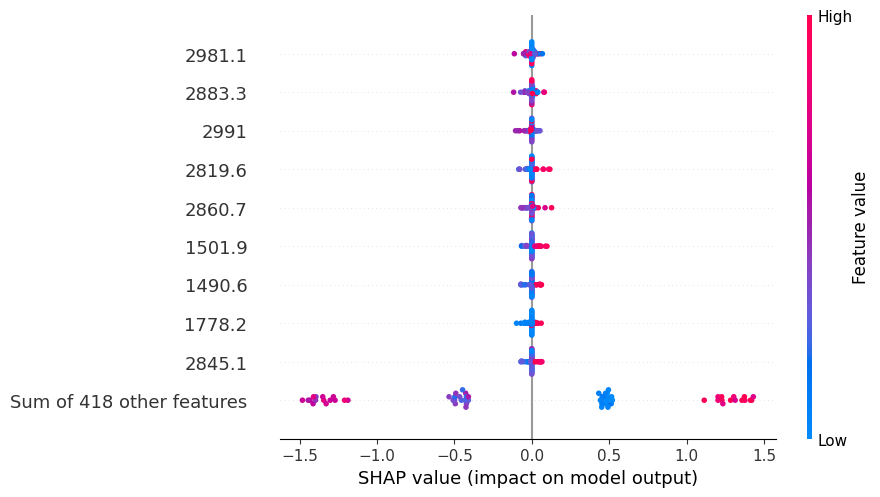

In [ ]:
# Gráfico de resumo da importáncia das features: OPÇÃO 2
shap.plots.beeswarm(shap_values)

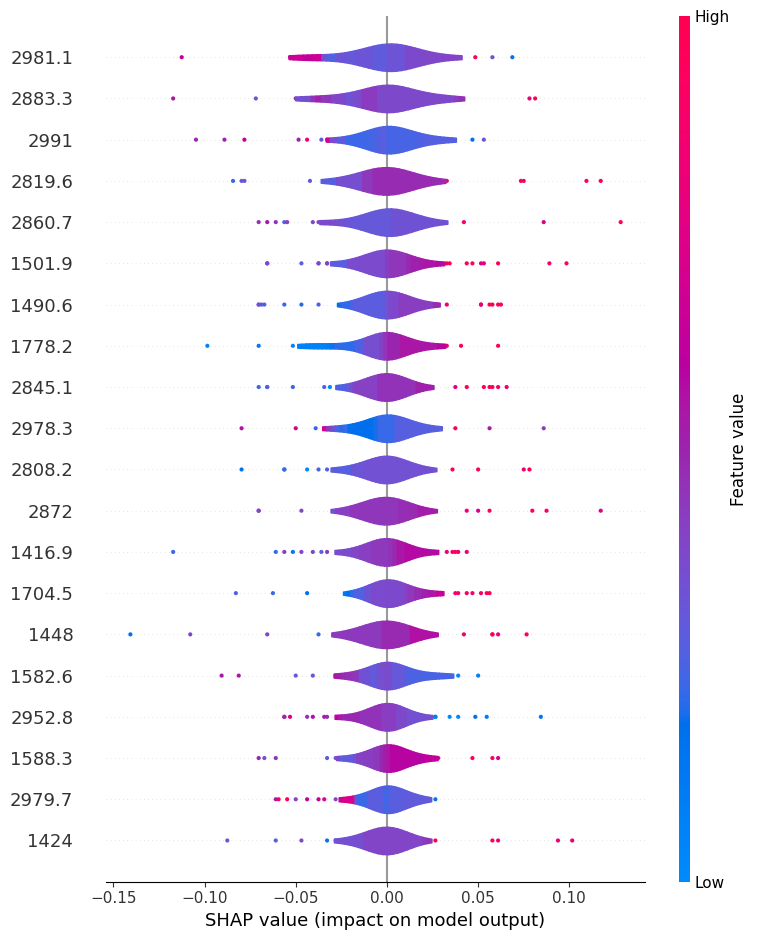

In [ ]:
# Gráfico de resumo da importáncia das features: OPÇÃO 3
shap.summary_plot(shap_values, plot_type='violin')

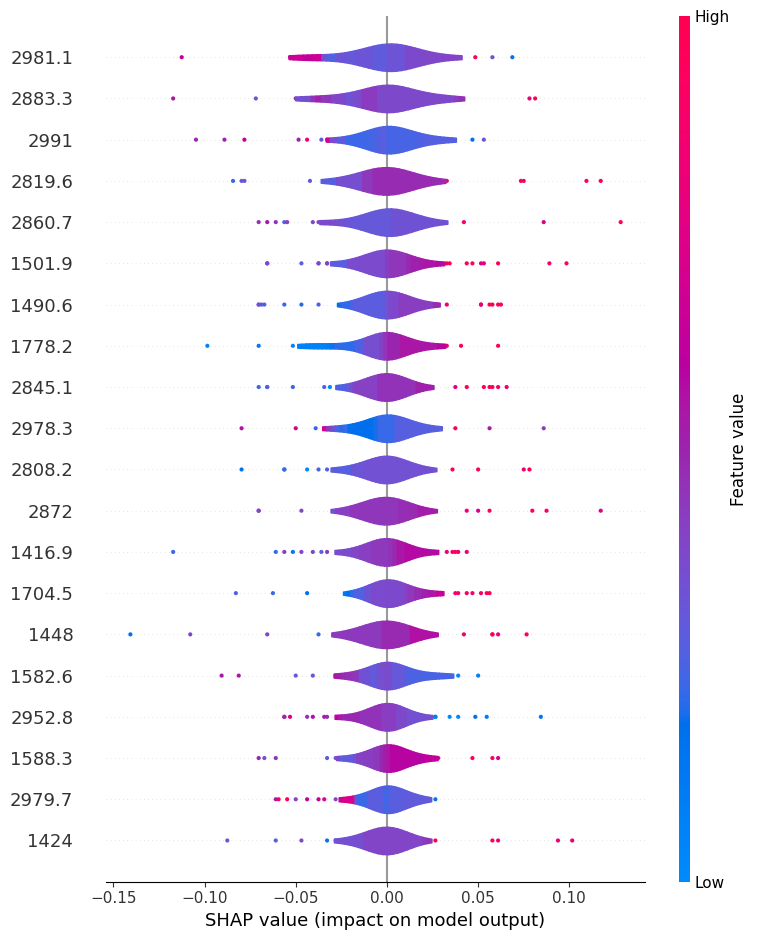

In [ ]:
#Salvar a figura em SVG
import matplotlib.pyplot as pl
shap.summary_plot(shap_values,plot_type='violin', show=False)
pl.savefig("shap_rf_dyslipidemia.png",dpi=700) #.png,.pdf will also support here

# Conclusões sobre o modelo:

In [ ]:
### A metodologia SHAP value foi aplicada para entender as featuers importantes que impactam na classificação
### A feature que mais contribuiram foram:
###